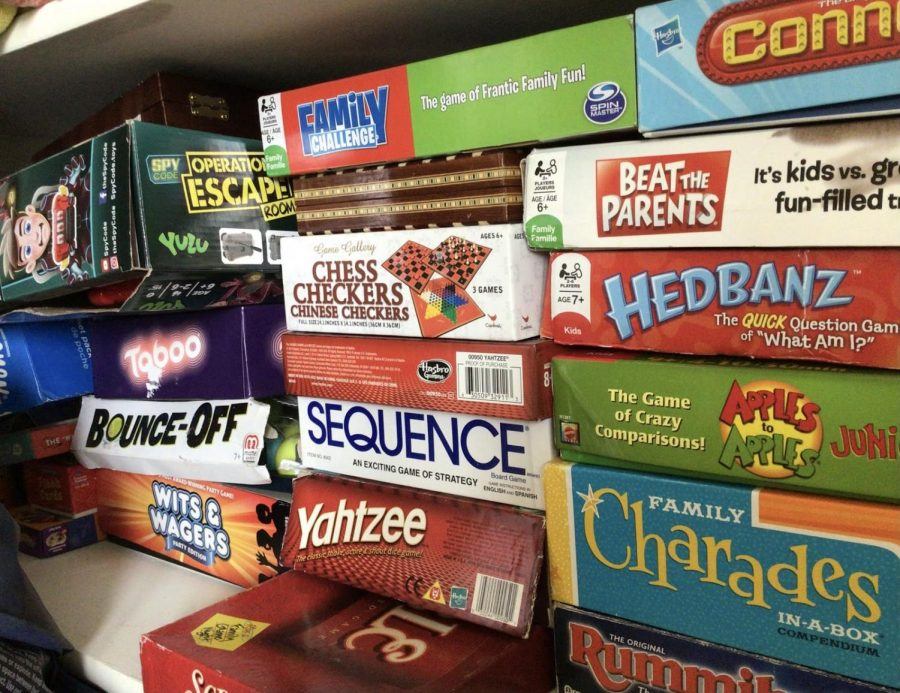

# Boardgames Data Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

###########################################################################################################################

## Loading data and Initial EDA:

In [2]:
brdg_df = pd.read_csv("boardgames1.csv")

- Renamed few columns for clarity and future analysis:

In [3]:
brdg_df.columns = brdg_df.columns.str.replace("baverage","geek_rating")
brdg_df.columns = brdg_df.columns.str.replace("average","average_rating")
brdg_df.columns = brdg_df.columns.str.replace("boardgamehonor_cnt","award_counts")
brdg_df.columns = brdg_df.columns.str.replace("news","BGG_news")
brdg_df.columns = brdg_df.columns.str.replace("blogs","BGG_blogs")

- Displaying column names of the dataset and first few rows of the data:

In [4]:
# brdg_df.columns

In [5]:
#brdg_df.head(10)

- Basic numerical EDA:

In [6]:
#brdg_df.describe()

- Correlation for all numerical data columns of interest:

In [7]:
#brdg_df.corr()

- Creating a categories column for different geek ratings:

In [8]:
brdg_df["geek_rating_category"] = brdg_df["geek_rating"]\
            .apply(lambda x: "Geek rating > 7" if x >=7\
                   else "Geek rating > 6 and < 7" if x<7 and x>=6\
                   else "Geek rating > 5 and < 6" if x<6 and x>=5\
                   else "Geek rating < 5")

In [9]:
brdg_df["geek_rating_category"].value_counts(normalize=True)

Geek rating > 5 and < 6    0.81125
Geek rating > 6 and < 7    0.09885
Geek rating < 5            0.07160
Geek rating > 7            0.01830
Name: geek_rating_category, dtype: float64

- Creating a categories column for different site views:

In [10]:
brdg_df["site_views_category"] = brdg_df["siteviews"]\
            .apply(lambda x: "Site Views > 25K" if x >=25000\
                   else "Site Views < 25K")

In [11]:
brdg_df["site_views_category"].value_counts()

Site Views < 25K    10396
Site Views > 25K     9604
Name: site_views_category, dtype: int64

In [12]:
brdg_df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average_rating', 'geek_rating', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'BGG_news', 'BGG_blogs',
       'weblink', 'podcast', 'label', 'boardgamedesigner_cnt',
       'boardgameartist_cnt', 'boardgamepublisher_cnt', 'award_counts',
       'boardgamecategory_cnt', 'boardgamemechanic_cnt',
       'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'boardgamehonor', 'boardgamecategory', 'boardgameversion',
       'boardgamemechanic', 'boardgameexpansion', 'boardgamefamily',
       'description', 'gamelink', 'geek_rating_category',
       'site

###########################################################################################################################

## Evaluating geek ratings for all games:

- Displaying ratings density plot:

Text(0, 0.5, 'Density')

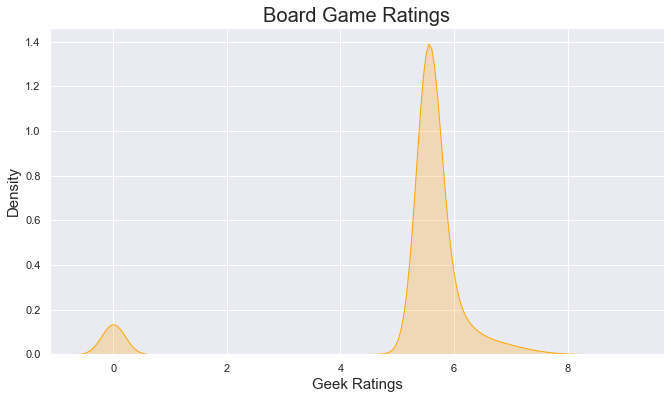

In [63]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(brdg_df["geek_rating"], shade = True, color="orange").set_title("Board Game Ratings",fontsize = 20)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Density", fontsize = 15)

- Displaying histogram of game counts per rating category:

Text(0.5, 1.0, 'Histogram of Geek Ratings')

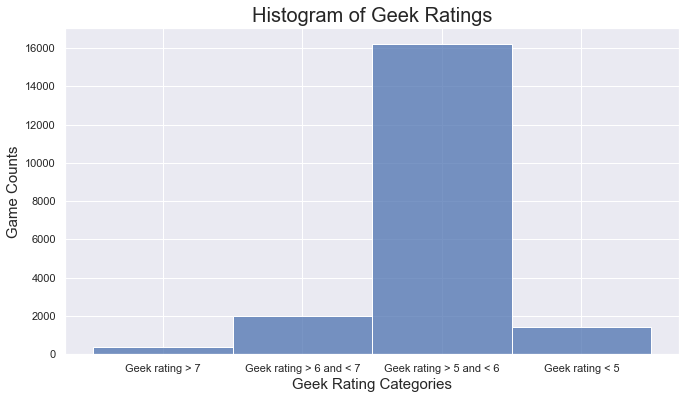

In [14]:
sns.histplot(brdg_df["geek_rating_category"])
plt.xlabel("Geek Rating Categories",fontsize = 15)
plt.ylabel("Game Counts",fontsize = 15)
plt.title("Histogram of Geek Ratings", fontsize = 20)

###########################################################################################################################

## Evaluation of 150 highest rated boardgames and site views:

- Top 150 board games sorted by game geek ratings:

In [15]:
rating_views_top = brdg_df[["name","geek_rating","siteviews"]]\
        .sort_values("geek_rating",ascending=False).head(150)
rating_views_top

,name,geek_rating,siteviews
0,Gloomhaven,8.58424,8933078
1,Pandemic Legacy Season 1,8.47159,2971746
2,Terraforming Mars,8.26781,4724387
3,Through the Ages A New Story of Civilization,8.23513,2448074
4,Brass Birmingham,8.20459,894621
...,...,...,...
144,\u062c\u0648\u0627\u0647\u0631\u064a,7.35206,1730330
145,Goa A New Expedition,7.34947,873752
146,Tichu,7.34824,802488
147,Detective A Modern Crime Board Game,7.34381,490214


In [16]:
rating_views_top.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,7.624845,1.661943e+06
std,0.254136,1.228917e+06
min,7.342780,2.738540e+05
25%,7.426147,8.451090e+05
50%,7.556870,1.255121e+06
75%,7.768045,2.044964e+06
max,8.584240,8.933078e+06


- Correlation between geek ratings and site views:

In [17]:
rating_views_top.corr()

,geek_rating,siteviews
geek_rating,1.00000,0.60716
siteviews,0.60716,1.00000


- Distribution of geek ratings for top 150 games:

Text(0, 0.5, 'Density')

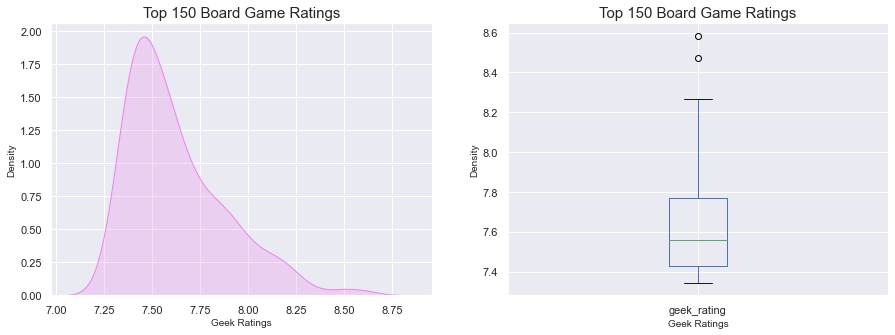

In [66]:
plt.figure(2)

plt.subplot(121)
sns.kdeplot(rating_views_top["geek_rating"], color="violet",shade = True)\
                    .set_title("Top 150 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 10)
plt.ylabel("Density", fontsize = 10)

plt.subplot(122)
rating_views_top["geek_rating"].plot.box(figsize=(15,5)).set_title("Top 150 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 10)
plt.ylabel("Density", fontsize = 10)

- Trend showing relation between site views and geek ratings for top 150 games:

Text(0.5, 1.0, 'Top 150: site views vs. geek ratings')

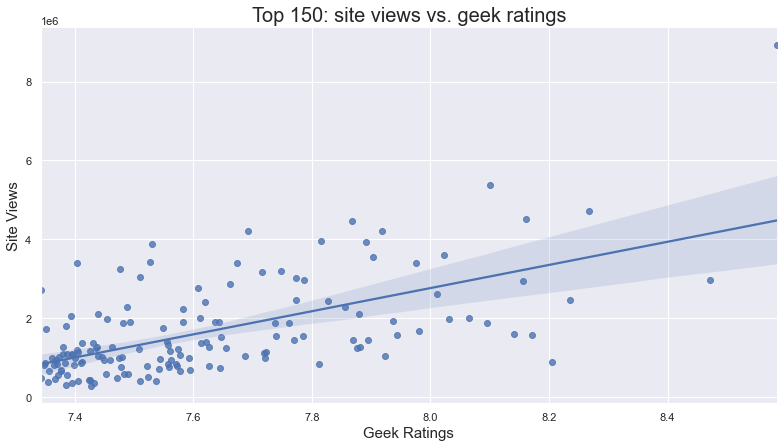

In [19]:
sns.lmplot("geek_rating", "siteviews", rating_views_top, height=6, aspect=1.8)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Site Views", fontsize = 15)
plt.title("Top 150: site views vs. geek ratings", fontsize = 20)

### Evaluation of 150 lowest rated boardgames and site views:

- Bottom 150 board games sorted by game geek ratings:

In [20]:
rating_views_bottom = brdg_df[["name","geek_rating","siteviews"]]\
        .sort_values("geek_rating",ascending=False)\
        .loc[brdg_df.geek_rating > 0,:].tail(150)
rating_views_bottom

,name,geek_rating,siteviews
18261,Go To The Top Of The Class,5.33274,67126
18262,Feed the Kitty,5.33239,27893
18263,Pass the Pigs,5.33201,248338
18264,Fallen City of Karez,5.33149,140708
18265,Trivial Pursuit 20th Anniversary Edition,5.33024,66814
...,...,...,...
18406,War,3.98527,53095
18407,Bingo,3.89746,45273
18408,Candy Land The Disney Theme Park Edition,3.77222,285110
18409,Chutes and Ladders,3.58867,226580


In [21]:
rating_views_bottom.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,5.077048,1.399950e+05
std,0.349820,4.432717e+05
min,3.506730,8.410000e+03
25%,5.004008,4.027025e+04
50%,5.219855,6.750250e+04
75%,5.296655,1.199375e+05
max,5.332740,5.349478e+06


- Correlation between geek ratings and site views:

In [22]:
rating_views_bottom.corr()

,geek_rating,siteviews
geek_rating,1.000000,-0.252535
siteviews,-0.252535,1.000000


- Distribution of geek ratings for bottom 150 games:

Text(0, 0.5, 'Density')

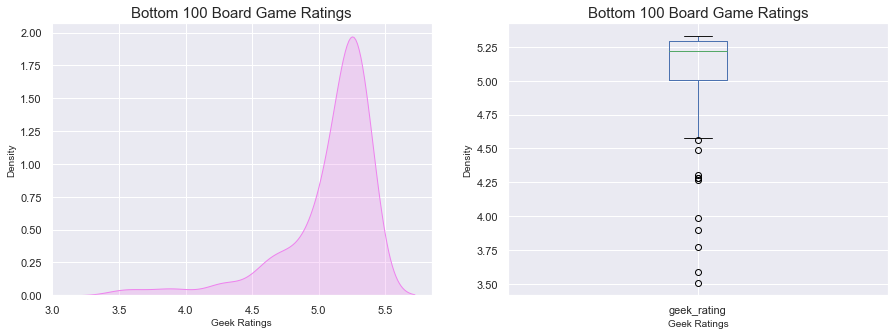

In [70]:
plt.figure(2)

plt.subplot(121)
sns.kdeplot(rating_views_bottom["geek_rating"],color="violet",shade = True)\
            .set_title("Bottom 100 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 10)
plt.ylabel("Density", fontsize = 10)


plt.subplot(122)
rating_views_bottom["geek_rating"].plot.box(figsize=(15,5)).set_title("Bottom 100 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 10)
plt.ylabel("Density", fontsize = 10)

- Trend showing relation between site views and geek ratings for bottom 150 games:

Text(0.5, 1.0, 'Bottom 100 site views vs. geek ratings')

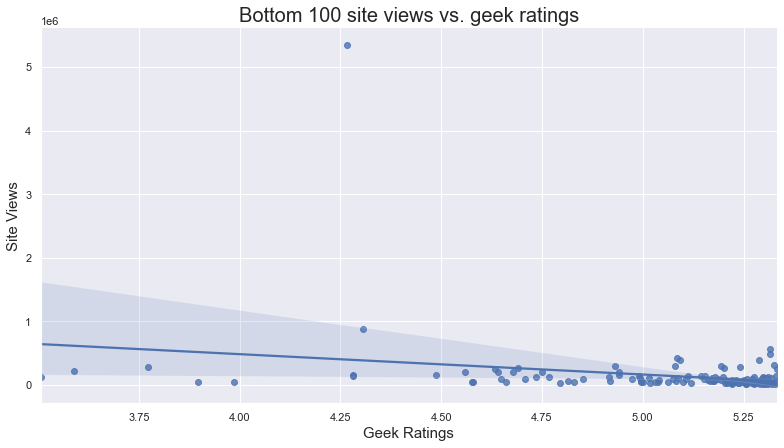

In [24]:
sns.lmplot("geek_rating", "siteviews", rating_views_bottom, height=6, aspect=1.8)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Site Views", fontsize = 15)
plt.title("Bottom 100 site views vs. geek ratings", fontsize = 20)

- Trend showing relation between site views and geek ratings for all games:

Text(0.5, 1.0, 'Trend depicting site views and geek ratings')

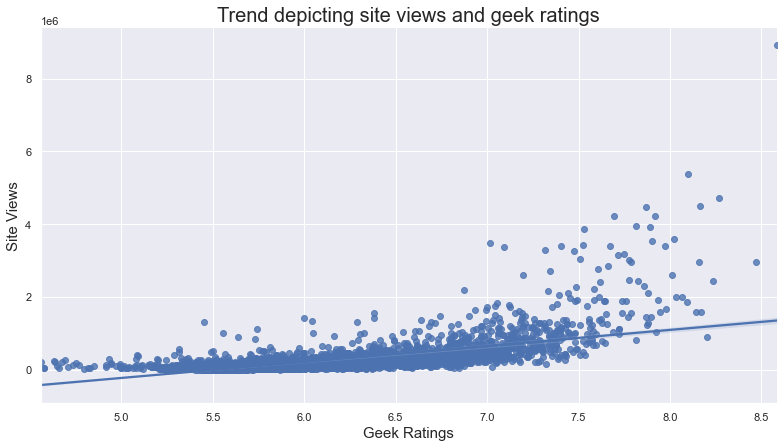

In [25]:
sns.lmplot("geek_rating", "siteviews", brdg_df.loc[brdg_df.geek_rating > 4.5,:], height=6, aspect=1.8)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Site Views", fontsize = 15)
plt.title("Trend depicting site views and geek ratings", fontsize = 20)

###########################################################################################################################

## Evaluating geek ratings vs game awards:

- Board games displayed whose ratings are > 0 and award counts are > 0:

In [26]:
honor_df = brdg_df[["name","geek_rating","geek_rating_category","award_counts"]]\
                .sort_values("geek_rating",ascending=False)\
                .loc[(brdg_df.geek_rating > 0) & (brdg_df.award_counts > 0)]

In [27]:
honor_df.describe()

,geek_rating,award_counts
count,3498.000000,3498.000000
mean,6.050853,2.485992
std,0.595030,3.117094
min,4.931720,1.000000
25%,5.569840,1.000000
50%,5.818320,1.000000
75%,6.407077,3.000000
max,8.584240,50.000000


- Correlation between geek ratings and award counts:

In [28]:
honor_df.corr()

,geek_rating,award_counts
geek_rating,1.000000,0.566378
award_counts,0.566378,1.000000


### Number of awards for top and bottom 20 board games (sorted by rating):

In [29]:
top_20 = honor_df.head(20)

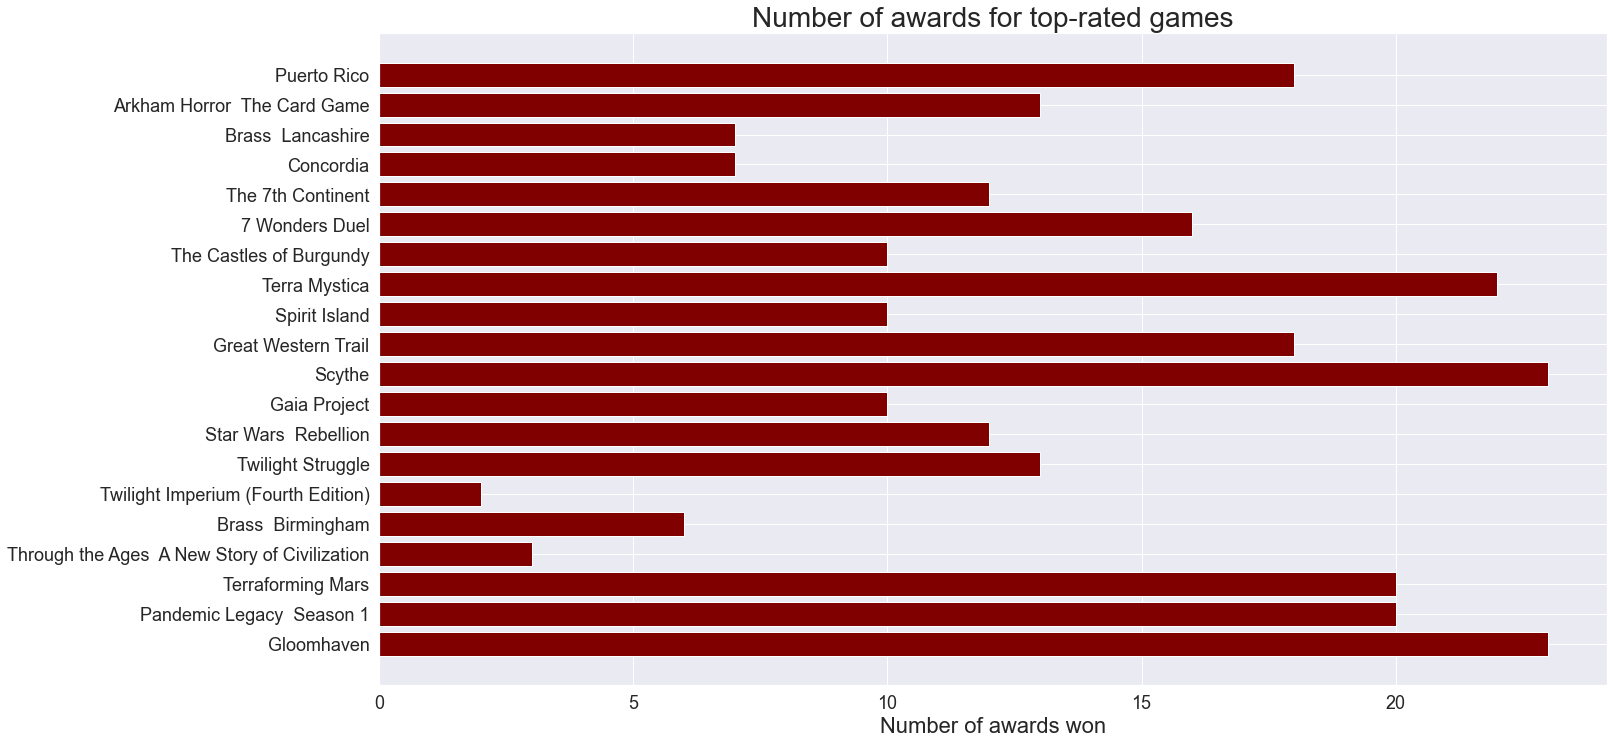

In [30]:
plt.figure(figsize = (22,12))
plt.barh(top_20.name, top_20.award_counts, color ="maroon")
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [31]:
bottom_20 = honor_df.tail(20)

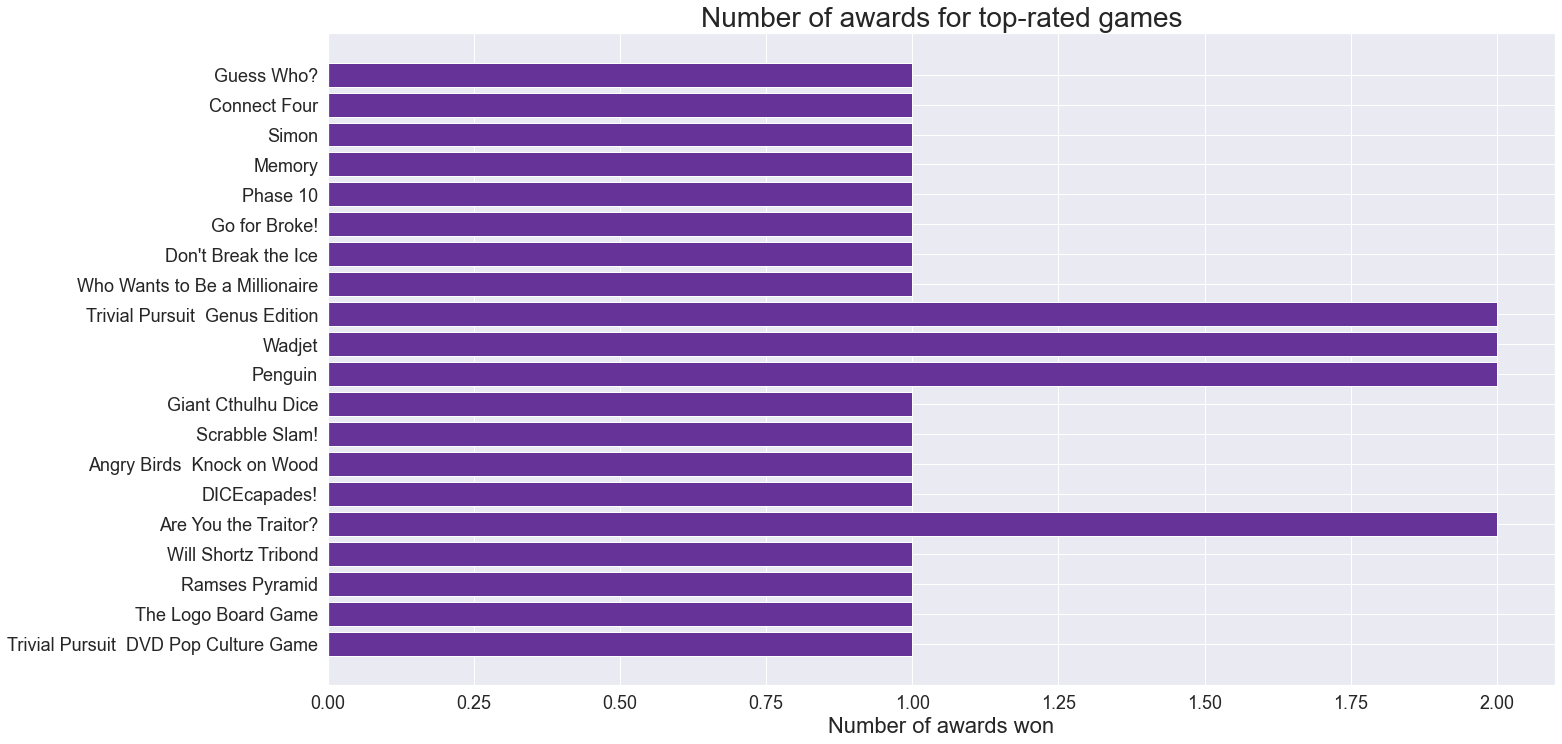

In [32]:
plt.figure(figsize = (22,12))
plt.barh(bottom_20.name, bottom_20.award_counts, color ="rebeccapurple")
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### Plotting average award counts for each geek rating category :

In [71]:
award_df = pd.DataFrame(honor_df.groupby("geek_rating_category")["award_counts"].mean()).reset_index()
award_df

,geek_rating_category,award_counts
0,Geek rating < 5,1.000000
1,Geek rating > 5 and < 6,1.506737
2,Geek rating > 6 and < 7,2.837764
3,Geek rating > 7,7.564417


Text(0.5, 1.0, 'Average award counts for different rating categories')

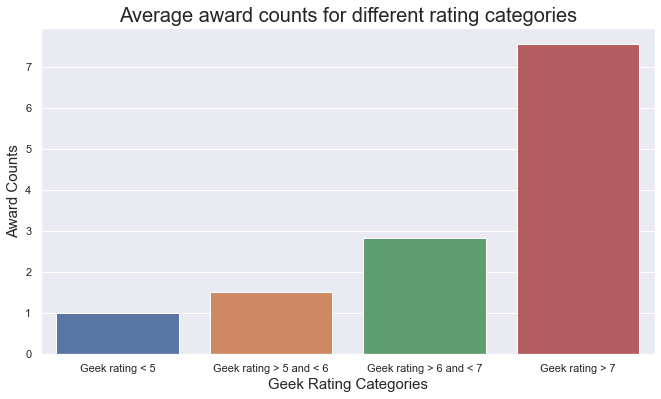

In [73]:
ax = sns.barplot(x = "geek_rating_category", y = "award_counts", data = award_df, errwidth=0)
plt.xlabel("Geek Rating Categories", fontsize = 15)
plt.ylabel("Award Counts", fontsize = 15)
plt.title("Average award counts for different rating categories", fontsize = 20)

###########################################################################################################################

### Evaluating geek ratings vs game awards:

- Histogram of game site views:

Text(0.5, 1.0, 'Game Site Views')

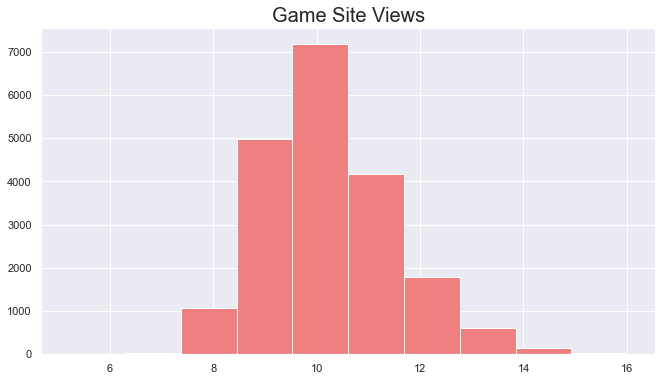

In [42]:
plt.hist(np.log(brdg_df['siteviews']), color = "lightcoral")
plt.title('Game Site Views', fontsize = 20)

- Site views per rating category:

In [76]:
siteviews_df = pd.DataFrame(brdg_df.groupby('geek_rating_category')["siteviews"].median()).reset_index()
siteviews_df

,geek_rating_category,siteviews
0,Geek rating < 5,6863.5
1,Geek rating > 5 and < 6,21989.0
2,Geek rating > 6 and < 7,190586.0
3,Geek rating > 7,863421.0


Text(0.5, 1.0, 'Median of site views for different rating categories')

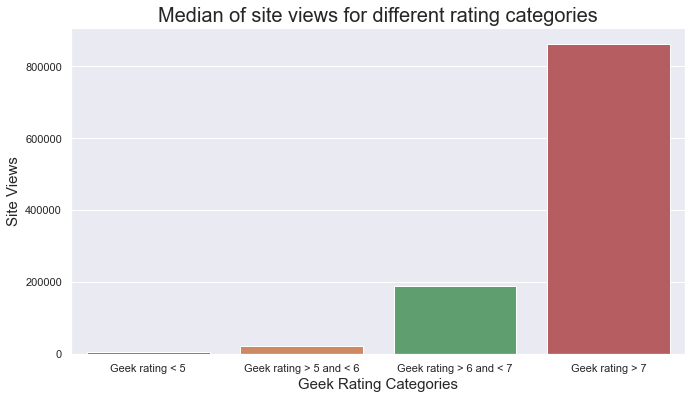

In [77]:
ax = sns.barplot(x = "geek_rating_category", y = "siteviews", data = siteviews_df, errwidth=0)
plt.xlabel('Geek Rating Categories', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Median of site views for different rating categories', fontsize = 20)

###########################################################################################################################

### Evaluating site views vs different media types:

- Selected outside media counts and compared with siteviews for each rating category:

In [45]:
media_df = brdg_df[["geek_rating","geek_rating_category","siteviews","podcast","weblink"]]\
                   .loc[brdg_df.geek_rating > 0,:]\
                   .loc[brdg_df.siteviews < 6.0e+6,:]\
                   .loc[((brdg_df.podcast > 0) & (brdg_df.podcast < 500)) & (brdg_df.weblink > 0)]

In [46]:
media_df

,geek_rating,geek_rating_category,siteviews,podcast,weblink
1,8.47159,Geek rating > 7,2971746,164,69
2,8.26781,Geek rating > 7,4724387,148,60
3,8.23513,Geek rating > 7,2448074,42,30
4,8.20459,Geek rating > 7,894621,21,13
5,8.17076,Geek rating > 7,1573904,44,20
...,...,...,...,...,...
19140,5.86353,Geek rating > 5 and < 6,71029,1,4
19141,5.73489,Geek rating > 5 and < 6,62725,1,3
19429,6.17089,Geek rating > 6 and < 7,112729,1,12
19585,5.59398,Geek rating > 5 and < 6,31075,1,3


- Correlation between outside media counts and siteviews:

In [47]:
media_df[["siteviews","podcast","weblink"]].corr()

,siteviews,podcast,weblink
siteviews,1.000000,0.786209,0.683638
podcast,0.786209,1.000000,0.618982
weblink,0.683638,0.618982,1.000000


- Trend showing relation between site views and podcasts about the game:

Text(0.5, 1.0, 'Podcast Counts vs. Site Views')

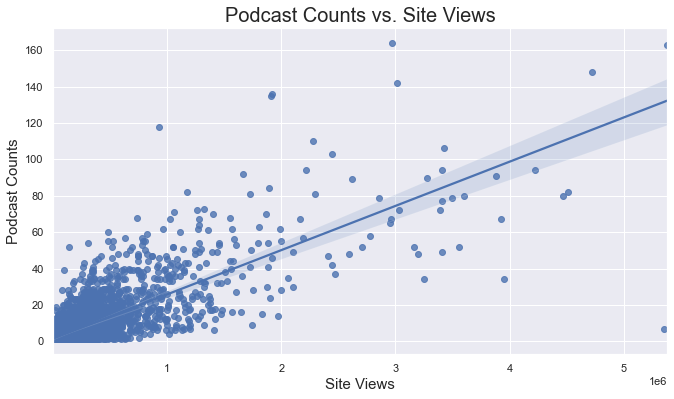

In [48]:
sns.regplot(x=media_df["siteviews"], y=media_df["podcast"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("Podcast Counts", fontsize = 15)
plt.title("Podcast Counts vs. Site Views", fontsize = 20)

- Trend showing relation between site views and weblinks for different online media articles about the game:

Text(0.5, 1.0, 'Weblink Counts vs. Site Views')

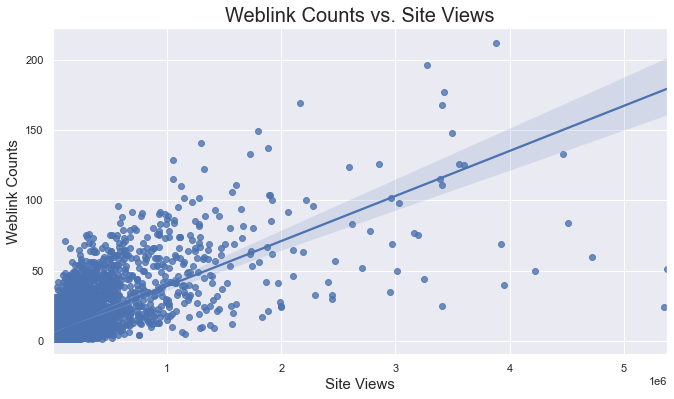

In [49]:
sns.regplot(x=media_df["siteviews"], y=media_df["weblink"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("Weblink Counts", fontsize = 15)
plt.title("Weblink Counts vs. Site Views", fontsize = 20)

- Selected BGG media counts and compared with siteviews for each rating category:

In [50]:
bgg_site_df = brdg_df[["geek_rating","geek_rating_category","siteviews","BGG_news","BGG_blogs"]]\
                    .loc[brdg_df.geek_rating > 0,:]\
                    .loc[brdg_df.siteviews < 6.0e+6,:]\
                    .loc[(brdg_df.BGG_news > 0) & (brdg_df.BGG_blogs > 0)]

In [51]:
bgg_site_df

,geek_rating,geek_rating_category,siteviews,BGG_news,BGG_blogs
1,8.47159,Geek rating > 7,2971746,9,597
2,8.26781,Geek rating > 7,4724387,14,1158
3,8.23513,Geek rating > 7,2448074,5,185
4,8.20459,Geek rating > 7,894621,3,124
5,8.17076,Geek rating > 7,1573904,2,67
...,...,...,...,...,...
19105,5.88896,Geek rating > 5 and < 6,34325,1,2
19140,5.86353,Geek rating > 5 and < 6,71029,1,1
19141,5.73489,Geek rating > 5 and < 6,62725,2,1
19424,5.53021,Geek rating > 5 and < 6,14565,1,3


- Correlation between BGG media counts and siteviews:

In [52]:
bgg_site_df[["siteviews","BGG_news","BGG_blogs"]].corr()

,siteviews,BGG_news,BGG_blogs
siteviews,1.000000,0.509123,0.805586
BGG_news,0.509123,1.000000,0.635450
BGG_blogs,0.805586,0.635450,1.000000


- Trend showing relation between site views and BGG written articles about the game (posted on game page on BGG website):

Text(0.5, 1.0, 'BGG news articles vs. Site Views')

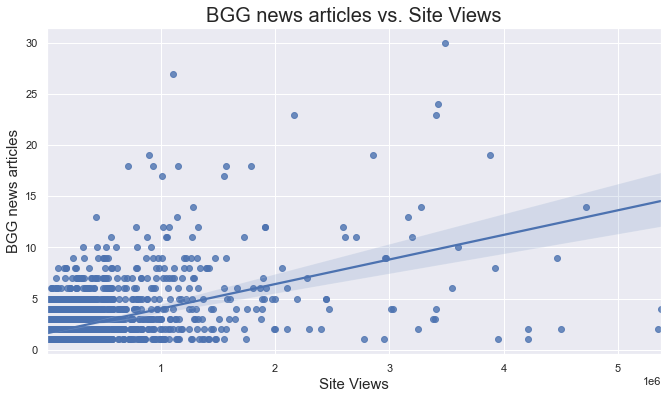

In [53]:
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_news"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("BGG news articles", fontsize = 15)
plt.title("BGG news articles vs. Site Views", fontsize = 20)

Text(0.5, 1.0, 'BGG blog posts vs. Site Views')

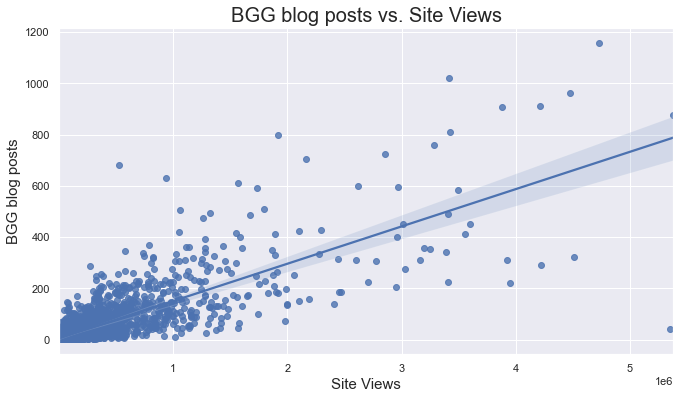

In [54]:
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_blogs"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("BGG blog posts", fontsize = 15)
plt.title("BGG blog posts vs. Site Views", fontsize = 20)

###########################################################################################################################

## Evaluating minimum playing time for games per category:

- Two categories were choosen for this evaluation, Geek rating > 6 and < 7 and Geek rating > 7

In [55]:
minplaytime_df = brdg_df[["geek_rating_category","minplaytime",]]\
                             .groupby(["geek_rating_category","minplaytime"])\
                             .size().reset_index(name="No. of games")

- Bar graphs displaying how many games had highest percentage of certain minimum playing time:

Text(0.5, 1.0, 'Geek rating > 6 and < 7')

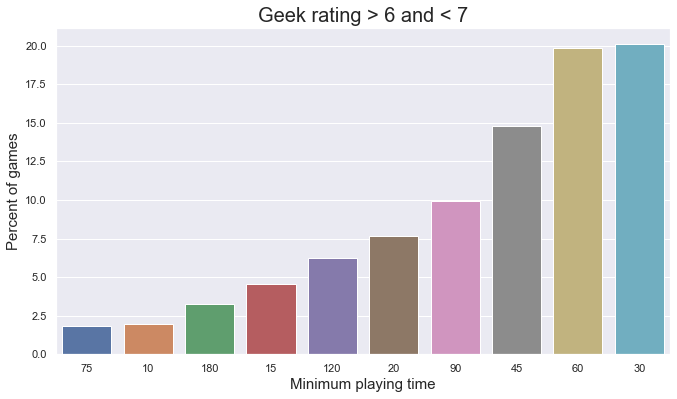

In [56]:
minplaytime_6_7 = minplaytime_df.loc[minplaytime_df["geek_rating_category"] == "Geek rating > 6 and < 7"]\
                     .sort_values(by="No. of games")

minplaytime_6_7["percent_of_games"] = (minplaytime_6_7["No. of games"]/sum(minplaytime_6_7["No. of games"]))*100
minplaytime_6_7 = minplaytime_6_7.tail(10)
sns.barplot(x = "minplaytime", y = "percent_of_games", data = minplaytime_6_7, order=minplaytime_6_7\
            .sort_values("percent_of_games").minplaytime)

plt.xlabel("Minimum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 6 and < 7", fontsize = 20)

Text(0.5, 1.0, 'Geek rating > 7')

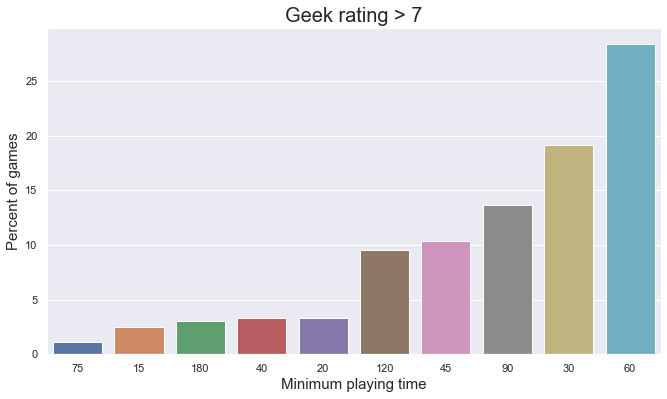

In [57]:
minplaytime_7 = minplaytime_df.loc[minplaytime_df["geek_rating_category"] == "Geek rating > 7"]\
                     .sort_values(by="No. of games")

minplaytime_7["percent_of_games"] = (minplaytime_7["No. of games"]/sum(minplaytime_7["No. of games"]))*100
minplaytime_7 = minplaytime_7.tail(10)
sns.barplot(x = "minplaytime", y = "percent_of_games", data = minplaytime_7, order=minplaytime_7\
            .sort_values("percent_of_games").minplaytime)

plt.xlabel("Minimum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 7", fontsize = 20)

## Evaluating maximum playing time for games per category:

- Two categories were choosen for this evaluation, Geek rating > 6 and < 7 and Geek rating > 7

In [58]:
maxplaytime_df = brdg_df[["geek_rating_category","maxplaytime",]]\
                             .groupby(["geek_rating_category","maxplaytime"])\
                             .size().reset_index(name="No. of games")

- Bar graphs displaying how many games had highest percentage of certain minimum playing time:

Text(0.5, 1.0, 'Geek rating > 6 and < 7')

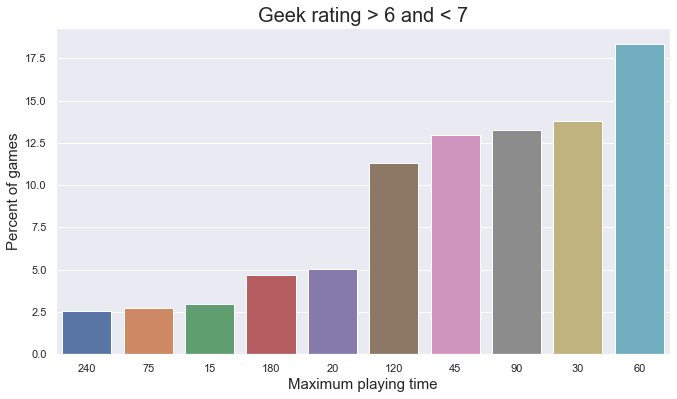

In [59]:
maxplaytime_6_7 = maxplaytime_df.loc[maxplaytime_df["geek_rating_category"] == "Geek rating > 6 and < 7"]\
                     .sort_values(by="No. of games")

maxplaytime_6_7["percent_of_games"] = (maxplaytime_6_7["No. of games"]/sum(maxplaytime_6_7["No. of games"]))*100
maxplaytime_6_7 = maxplaytime_6_7.tail(10)
sns.barplot(x = "maxplaytime", y = "percent_of_games", data = maxplaytime_6_7, order=maxplaytime_6_7\
            .sort_values("percent_of_games").maxplaytime)

plt.xlabel("Maximum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 6 and < 7", fontsize = 20)

Text(0.5, 1.0, 'Geek rating > 7')

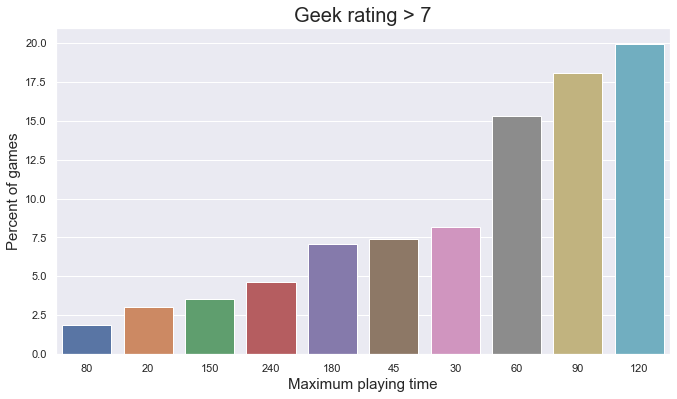

In [60]:
maxplaytime_7 = maxplaytime_df.loc[maxplaytime_df["geek_rating_category"] == "Geek rating > 7"]\
                     .sort_values(by="No. of games")
maxplaytime_7["percent_of_games"] = (maxplaytime_7["No. of games"]/sum(maxplaytime_7["No. of games"]))*100
maxplaytime_7 = maxplaytime_7.tail(10)

sns.barplot(x = "maxplaytime", y = "percent_of_games", data = maxplaytime_7, order=maxplaytime_7\
            .sort_values("percent_of_games").maxplaytime)

plt.xlabel("Maximum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 7", fontsize = 20)

###########################################################################################################################

In [164]:
categories_df = brdg_df[["name","geek_rating_category","geek_rating","boardgamecategory"]]

In [167]:
index=0
category_list = []
for item in categories_df.boardgamecategory:
    item2 = item.replace("'", "").replace("[", "").replace("]", "").split(", ")
    category_list.extend(map(lambda x: [index, x], item2))
    index += 1
# category_list

In [166]:
categorydf_2 = pd.DataFrame(category_list, columns = ['index1', 'genres'])
categorydf_2.head(30) 

,index1,genres
0,0,Adventure
1,0,Exploration
2,0,Fantasy
3,0,Fighting
4,0,Miniatures
5,1,Environmental
6,1,Medical
7,2,Economic
8,2,Environmental
9,2,Industry / Manufacturing


In [153]:
genre_df = pd.merge(categories_df.drop('boardgamecategory', axis = 1), categorydf_2\
         , how = 'right', left_index = True, right_on = 'index1')

In [160]:
genre_df = genre_df.loc[genre_df.geek_rating > 0,:].reset_index()